In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys
import glob

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
def compute_params(Data_df):
    
    phi_stat = []
    phi_0 = []
    NPQ = []
    ETR = []
    F0_norm = []
    FM_norm = []
    FS_norm = []
    
    def compute_data(i, Fmax_norm):
        try:
            phi_stat.append((Data_df.FM[i] - Data_df.FS[i]) / Data_df.FM[i])
        except:
            phi_stat.append(None)
        try:
            phi_0.append((Data_df.FM[i] - Data_df.F0[i]) / Data_df.FM[i])
        except:
            phi_0.append(None)
        NPQ.append((Fmax_norm - Data_df.FM[i]) / Data_df.FM[i])
        try:
            ETR.append(phi_stat[i] * Data_df.Actinic_intensity[i])
        except:
            ETR.append(None)
        try:
            F0_norm.append(Data_df.F0[i] / Fmax_norm) 
        except: F0_norm.append(None)
        
        FM_norm.append(Data_df.FM[i] / Fmax_norm)
        FS_norm.append(Data_df.FS[i] / Fmax_norm)
    
    for i in Data_df.index:
        Fmax_norm = Data_df[(Data_df.Experimental_index == "1A") & (Data_df.Experimental_point == 0)].FM.values.__float__()    
        compute_data(i, Fmax_norm)
        
    output = pd.DataFrame({'phi_stat': phi_stat, 'phi_0': phi_0, 'NPQ': NPQ, 'ETR': ETR, 'F0_norm': F0_norm, 'FM_norm': FM_norm, 'FS_norm': FS_norm})
    
    return output

In [3]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Validation_croise/csv/"
Fluo_liquide = pd.read_csv(folder + "flu_liquide_standard.csv", sep=";")
Microspeedzen = pd.read_csv(folder + "microspeedzen_standard.csv", sep=";")

fig_folder = f"{folder}figs/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)
    


In [4]:
all_data = {'Fluo_liquide': Fluo_liquide, 'Microspeedzen': Microspeedzen}

In [5]:
Fluo_liquide[(Fluo_liquide.Experimental_index == "1A") & (Fluo_liquide.Experimental_point == 0)].FM.values.__float__()

2829.0

In [6]:
test = {}
for experiment in all_data.keys():
    test[experiment] = compute_params(all_data[experiment])

In [7]:
test

{'Fluo_liquide':     phi_stat     phi_0       NPQ        ETR   F0_norm   FM_norm   FS_norm
 0   0.755037  0.789325  0.000000   0.000000  0.210675  1.000000  0.244963
 1   0.752326  0.772727  0.012527   0.000000  0.224461  0.987628  0.244609
 2   0.575880  0.769324  0.144881  23.035208  0.201485  0.873454  0.370449
 3   0.602033  0.748780  0.150000  24.081301  0.218452  0.869565  0.346059
 4   0.551455  0.748155  0.228398  49.630916  0.205019  0.814069  0.365147
 ..       ...       ...       ...        ...       ...       ...       ...
 71  0.552912  0.676894  0.771446  49.762054  0.182397  0.564510  0.252386
 72  0.549107  0.705995  0.804209  21.964286  0.162955  0.554259  0.249912
 73  0.581098  0.669860  0.806513  23.243934  0.182750  0.553552  0.231884
 74  0.690964  0.726506  0.704217   0.000000  0.160481  0.586780  0.181336
 75  0.684690  0.702916  0.718712   0.000000  0.172853  0.581831  0.183457
 
 [76 rows x 7 columns],
 'Microspeedzen':     phi_stat     phi_0       NPQ        

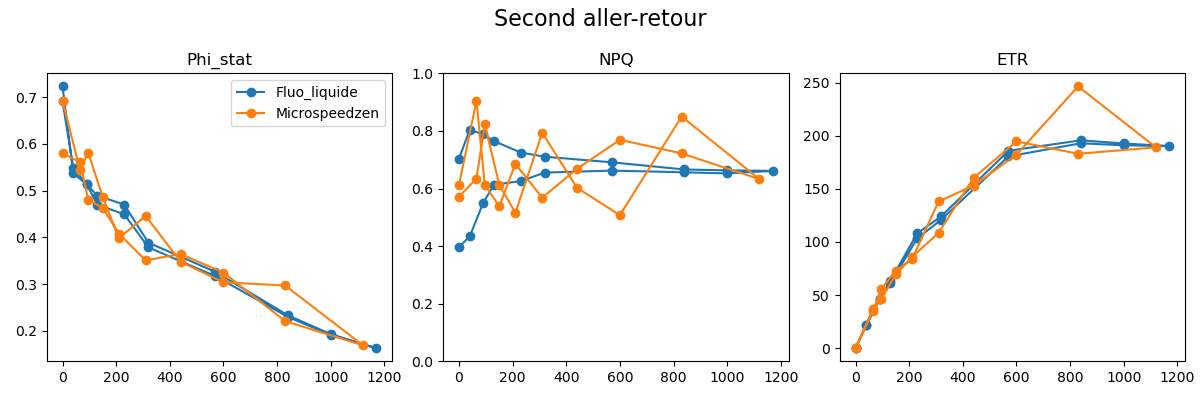

In [8]:
aller_retour = ['3A', '4A']

fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("Second aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    phi_stat = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].phi_stat
    ETR = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].ETR
    NPQ = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].NPQ
    ax[0].plot(x, phi_stat, 'o-', label=experiment)
    ax[1].plot(x, NPQ, 'o-', label=experiment)
    ax[2].plot(x, ETR, 'o-', label=experiment)

ax[0].set_title("Phi_stat")
ax[1].set_title("NPQ")
ax[2].set_title("ETR")
ax[0].legend()
ax[1].set_ylim(0, 1)
fig.tight_layout()

fig.savefig(f"{fig_folder}params_second_aller_retour.png", dpi = 300)

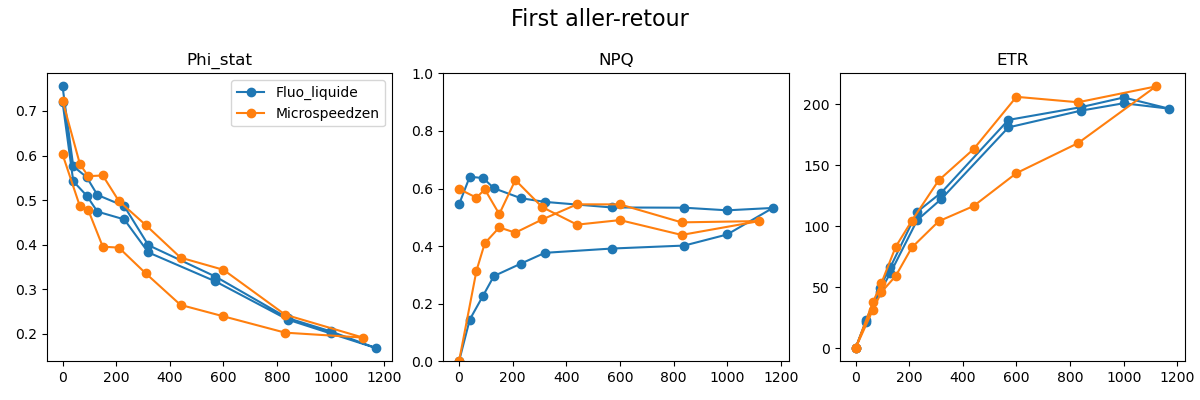

In [9]:
aller_retour = ['1A', '2A']

fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("First aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    phi_stat = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].phi_stat
    ETR = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].ETR
    NPQ = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].NPQ
    ax[0].plot(x, phi_stat, 'o-', label=experiment)
    ax[1].plot(x, NPQ, 'o-', label=experiment)
    ax[2].plot(x, ETR, 'o-', label=experiment)

ax[0].set_title("Phi_stat")
ax[1].set_title("NPQ")
ax[2].set_title("ETR")
ax[0].legend()
ax[1].set_ylim(0, 1)

fig.tight_layout()
fig.savefig(f"{fig_folder}params_first_aller_retour.png", dpi = 300)

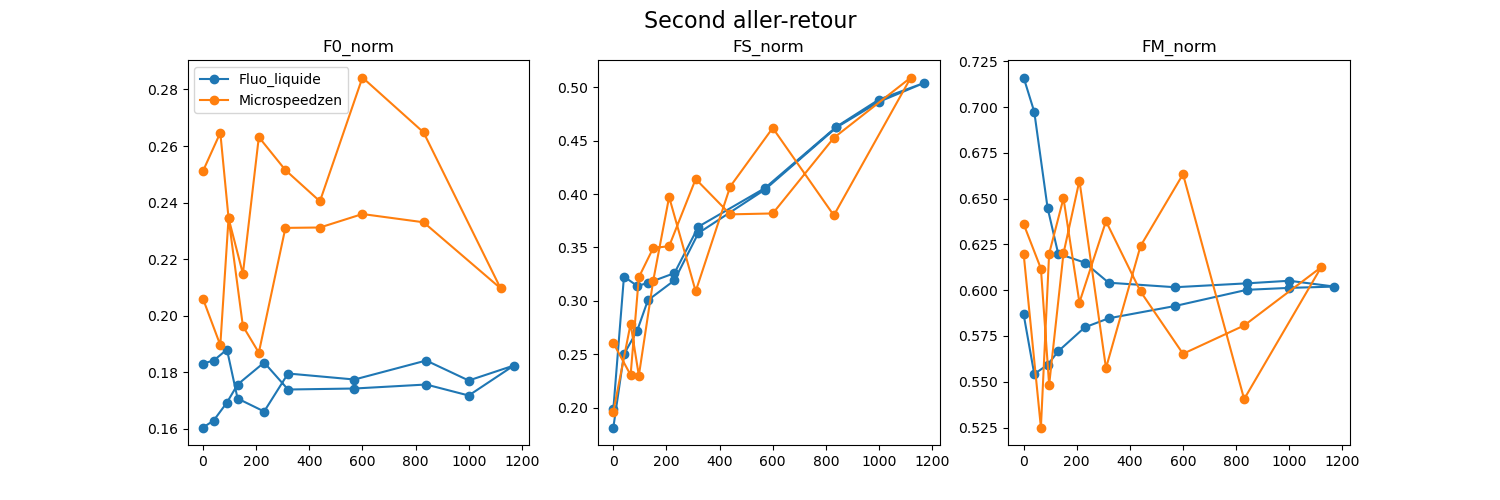

In [10]:
aller_retour = ['3A', '4A']

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("Second aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    F0_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].F0_norm
    FS_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FS_norm
    FM_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FM_norm

    ax[0].plot(x, F0_norm, 'o-', label=experiment)
    ax[1].plot(x, FS_norm, 'o-', label=experiment)
    ax[2].plot(x, FM_norm, 'o-', label=experiment)

ax[0].set_title("F0_norm")
ax[1].set_title("FS_norm")
ax[2].set_title("FM_norm")
ax[0].legend()


fig.savefig(f"{fig_folder}fluo_second_aller_retour.png", dpi = 300)

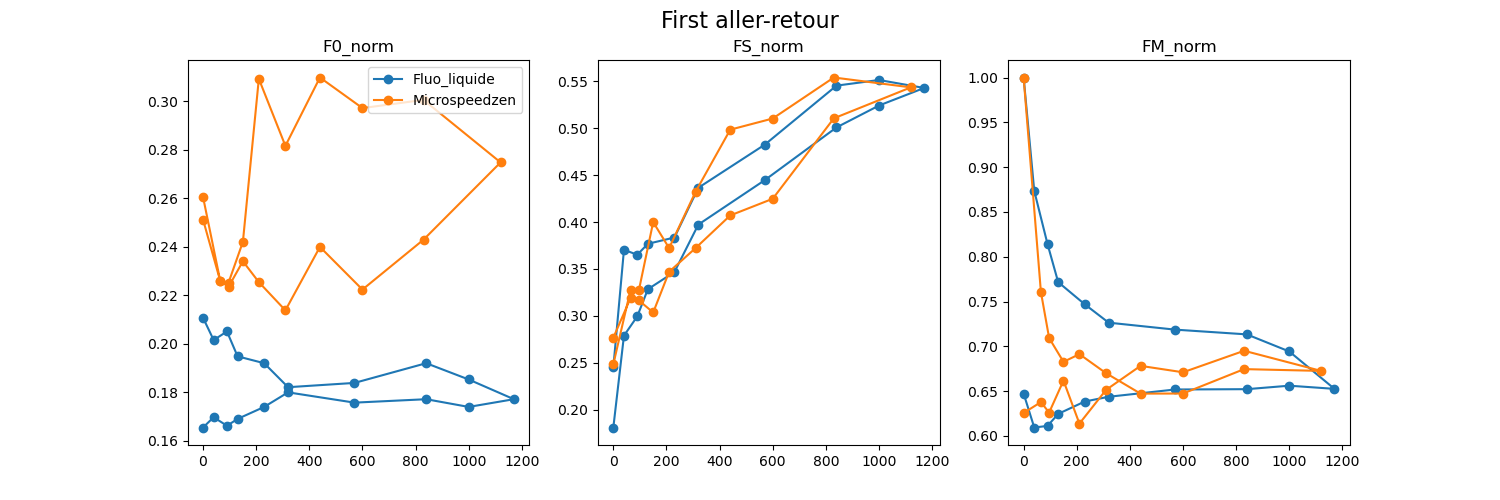

In [11]:
aller_retour = ['1A', '2A']

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("First aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    F0_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].F0_norm
    FS_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FS_norm
    FM_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FM_norm

    ax[0].plot(x, F0_norm, 'o-', label=experiment)
    ax[1].plot(x, FS_norm, 'o-', label=experiment)
    ax[2].plot(x, FM_norm, 'o-', label=experiment)

ax[0].set_title("F0_norm")
ax[1].set_title("FS_norm")
ax[2].set_title("FM_norm")
ax[0].legend()


fig.savefig(f"{fig_folder}fluo_first_aller_retour.png", dpi = 300)

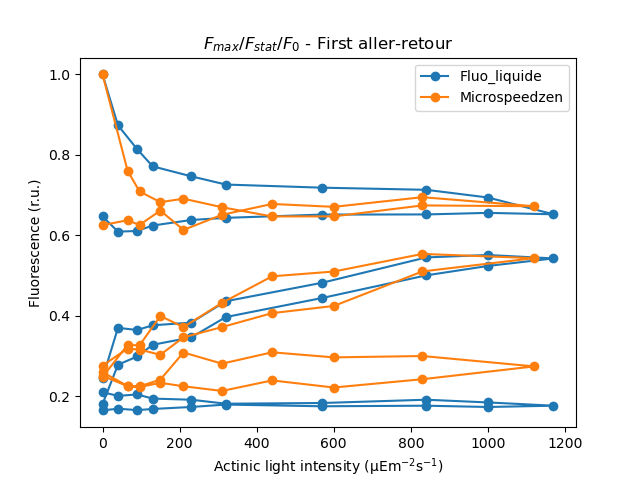

In [12]:
aller_retour = ['1A', '2A']

fig, ax = plt.subplots()
i = 0
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    F0_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].F0_norm
    FS_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FS_norm
    FM_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FM_norm

    ax.plot(x, F0_norm, 'o-', label=experiment, color = f"C{i}")
    ax.plot(x, FS_norm, 'o-', color = f"C{i}" )
    ax.plot(x, FM_norm, 'o-', color = f"C{i}")
    i=+1

ax.set_title("$F_{max} / F_{stat} / F_{0}$ - First aller-retour")
ax.set_xlabel('Actinic light intensity (µEm$^{-2}$s$^{-1}$)')
ax.set_ylabel('Fluorescence (r.u.)')
ax.legend()


fig.savefig(f"{fig_folder}fluo_first_aller_retour_all.png", dpi = 300)

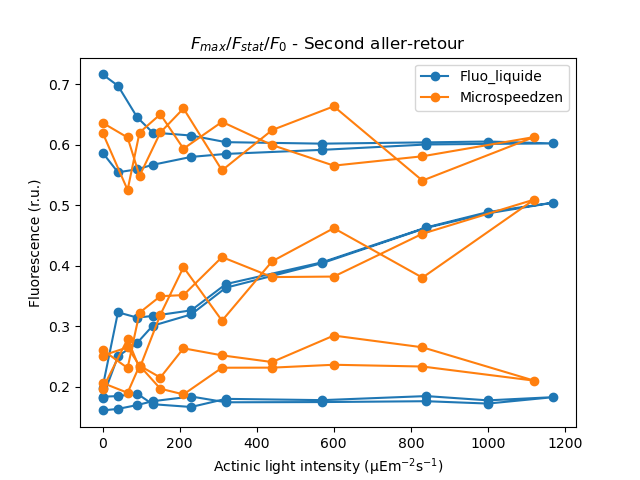

In [41]:
aller_retour = ['3A', '4A']

fig, ax = plt.subplots()
i = 0
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    F0_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].F0_norm
    FS_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FS_norm
    FM_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FM_norm

    ax.plot(x, F0_norm, 'o-', label=experiment, color = f"C{i}")
    ax.plot(x, FS_norm, 'o-', color = f"C{i}" )
    ax.plot(x, FM_norm, 'o-', color = f"C{i}")
    i=+1

ax.set_title("$F_{max} / F_{stat} / F_{0}$ - Second aller-retour")
ax.set_xlabel('Actinic light intensity (µEm$^{-2}$s$^{-1}$)')
ax.set_ylabel('Fluorescence (r.u.)')
ax.legend()


fig.savefig(f"{fig_folder}fluo_second_aller_retour_all.png", dpi = 300)